In [2]:
# US Traffic Accidents EDA
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
from datetime import datetime

# Load dataset - change to relative folder for universal usage
df = pd.read_csv("/Users/thomassimmons/Downloads/US_Accidents_March23.csv")
df.head()
print(f"Dataset shape: {df.shape}")

Dataset shape: (7728394, 46)


In [3]:
# Data cleaning

# Drop columns with more than 30 percent missing values
missing = df.isnull().mean()
df = df.drop(columns=missing[missing > 0.3].index)

# Convert start_time and end_time to datetime to streamline things
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed', errors='coerce')

# Create duration column in minutes
df['Duration_Minutes'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60

# Create new time-based features
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()
df['Year'] = df['Start_Time'].dt.year

# Get basic statistics

print(df.describe())
print(df['Severity'].value_counts())

           Severity                     Start_Time  \
count  7.728394e+06                        7728394   
mean   2.212384e+00  2020-06-04 04:23:22.765653760   
min    1.000000e+00            2016-01-14 20:18:33   
25%    2.000000e+00  2018-11-23 04:01:12.249999872   
50%    2.000000e+00            2020-11-11 08:40:22   
75%    2.000000e+00     2022-01-20 07:30:08.500000   
max    4.000000e+00            2023-03-31 23:30:00   
std    4.875313e-01                            NaN   

                            End_Time     Start_Lat     Start_Lng  \
count                        7728394  7.728394e+06  7.728394e+06   
mean   2020-06-04 11:47:48.023095040  3.620119e+01 -9.470255e+01   
min              2016-02-08 06:37:08  2.455480e+01 -1.246238e+02   
25%       2018-11-23 05:45:20.500000  3.339963e+01 -1.172194e+02   
50%              2020-11-11 15:56:29  3.582397e+01 -8.776662e+01   
75%              2022-01-20 17:44:40  4.008496e+01 -8.035368e+01   
max              2023-03-31 23:59:00 

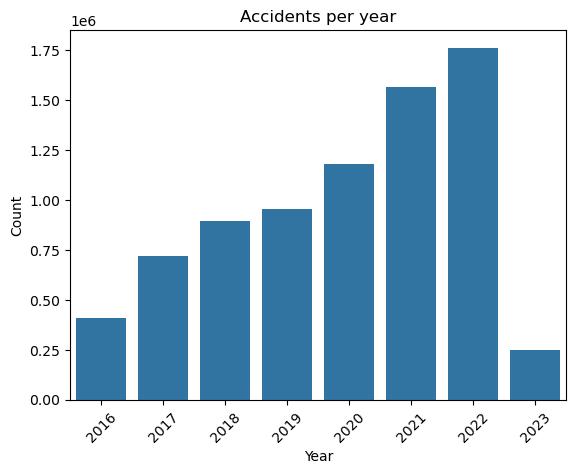

In [4]:
# Visualizations

# Accidents per year
sns.countplot(x='Year', data=df)
plt.title("Accidents per year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

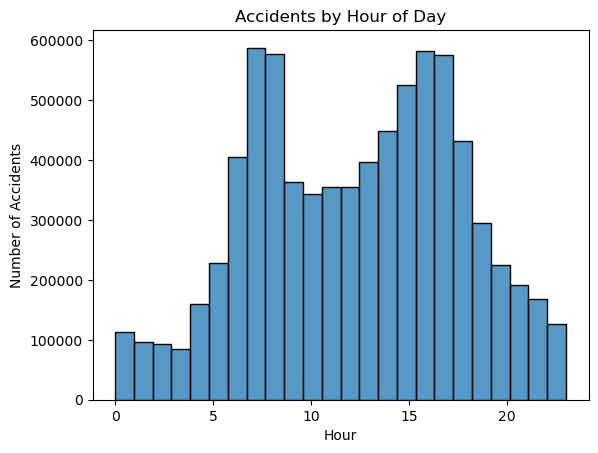

In [22]:
# Accidents by hour of the day
sns.histplot(df['Hour'], bins=24, kde=False)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()

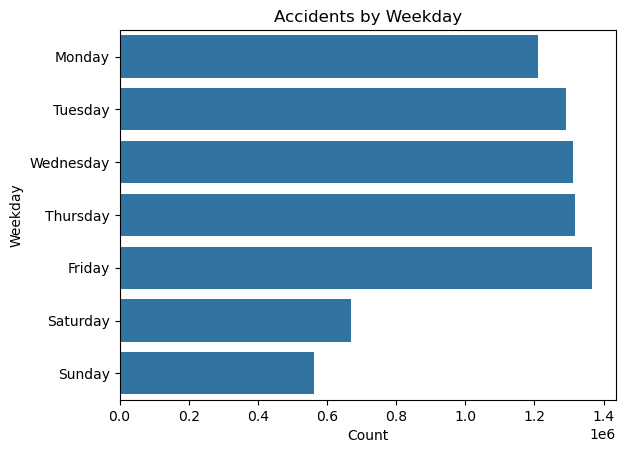

In [23]:
# Accidents by weekday
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(y='Weekday', data=df, order=order)
plt.title("Accidents by Weekday")
plt.xlabel("Count")
plt.show()

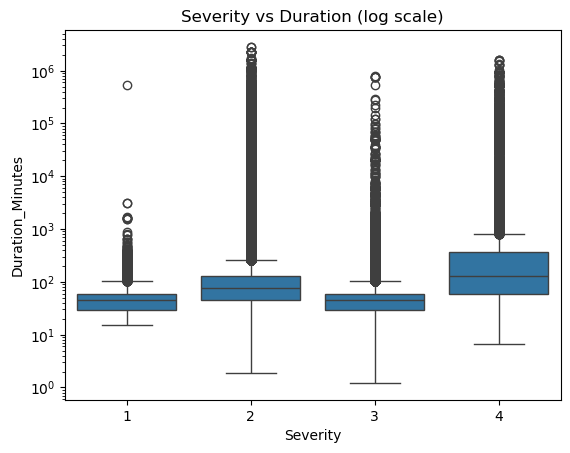

In [ ]:
# Severity vs Duration
sns.boxplot(x='Severity', y='Duration_Minutes', data=df)
plt.yscale('log')
plt.title('Severity vs Duration (log scale)')
plt.show()

In [10]:
# Save cleaned data to new csv 
df.to_csv('us_accidents_cleaned.csv', index=False)